In [1]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.8)


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jonghyeonbaek","key":"db21d867e4871683e1e2c8ed10a9a016"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d slothkong/10-monkey-species

 99% 542M/547M [00:06<00:00, 101MB/s] 
100% 547M/547M [00:06<00:00, 85.1MB/s]


In [5]:
!unzip 10-monkey-species.zip

Archive:  10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
  inflatin

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [50]:
class_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [51]:
def load_data():
    
    datasets = ['/content/training/training', '/content/validation/validation']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [52]:
(train_images, train_labels), (test_image, test_labels) = load_data()

  7%|▋         | 9/122 [00:00<00:01, 75.55it/s]

Loading /content/training/training


  0%|          | 0/30 [00:00<?, ?it/s]

Loading /content/validation/validation


100%|██████████| 26/26 [00:00<00:00, 75.94it/s]


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_images = train_images / 255.0


In [54]:
test_image = test_image / 255.0

In [55]:
test_labels.shape

(272,)

In [56]:
train_images.shape

(1098, 150, 150, 3)

In [57]:
train_labels.shape

(1098,)

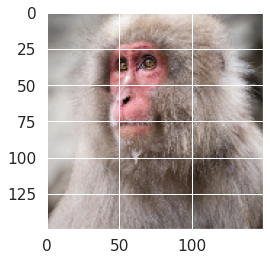

In [58]:
plt.imshow(train_images[0])

In [59]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [106]:
from tensorflow.keras.layers import *
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 36, 36, 32)       

In [109]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [104]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
train_labels = train_labels.reshape(len(train_labels),1)
train_labels = encoder.fit_transform(train_labels)
train_labels = train_labels.toarray()
test_labels = test_labels.reshape(len(test_labels),1)
test_labels = encoder.fit_transform(test_labels)
test_labels = test_labels.toarray()

ValueError: ignored

In [111]:
history = model.fit(train_images, train_labels, epochs=100,validation_data = (test_image,test_labels),
                    verbose=1)

Epoch 1/100
35/35 [==============================] - 1s 36ms/step - loss: 0.0958 - accuracy: 0.9718 - val_loss: 1.9602 - val_accuracy: 0.6838
Epoch 2/100
35/35 [==============================] - 1s 36ms/step - loss: 0.1122 - accuracy: 0.9627 - val_loss: 2.4839 - val_accuracy: 0.6838
Epoch 3/100
35/35 [==============================] - 1s 36ms/step - loss: 0.1341 - accuracy: 0.9590 - val_loss: 2.0421 - val_accuracy: 0.6691
Epoch 4/100
35/35 [==============================] - 1s 35ms/step - loss: 0.1687 - accuracy: 0.9481 - val_loss: 2.5403 - val_accuracy: 0.6581
Epoch 5/100
35/35 [==============================] - 1s 37ms/step - loss: 0.1300 - accuracy: 0.9581 - val_loss: 2.1382 - val_accuracy: 0.6801
Epoch 6/100
35/35 [==============================] - 1s 36ms/step - loss: 0.1128 - accuracy: 0.9672 - val_loss: 2.0596 - val_accuracy: 0.6728
Epoch 7/100
35/35 [==============================] - 1s 36ms/step - loss: 0.0878 - accuracy: 0.9709 - val_loss: 2.4798 - val_accuracy: 0.6728
Epoch 

In [116]:
test_loss, test_acc = model.evaluate(test_image,  test_labels)
print('\n테스트 정확도:', test_acc)

9/9 [==============================] - 0s 9ms/step - loss: 2.9635 - accuracy: 0.7096

테스트 정확도: 0.7095588445663452


In [118]:
pred=np.argmax(model.predict(test_image),axis=1)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


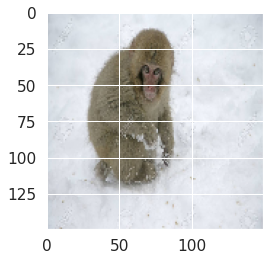

In [119]:
plt.imshow(test_image[0])
print(test_labels[0])
print(pred[0])